In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

<AxesSubplot:xlabel='x', ylabel='y'>

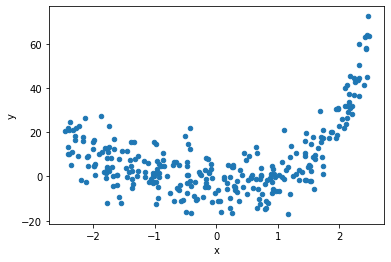

In [2]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size, 1)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size, 1)*8-4
df = pd.DataFrame({'x': X[:, 0], 'y': y[:, 0]})
df.plot.scatter(x='x',y='y')

In [3]:
X_bc = data_breast_cancer["data"][["mean texture", "mean symmetry"]]
X_bc

,mean texture,mean symmetry
0,10.38,0.2419
1,17.77,0.1812
2,21.25,0.2069
3,20.38,0.2597
4,14.34,0.1809
...,...,...
564,22.39,0.1726
565,28.25,0.1752
566,28.08,0.1590
567,29.33,0.2397


In [4]:
y_bc = data_breast_cancer["target"]
y_bc

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2)

In [6]:
# https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners/notebook

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {"max_depth":(list(range(1, 20)))}

In [8]:
tree_clf_bc = DecisionTreeClassifier(random_state=42)
tree_cv_bc = GridSearchCV(tree_clf_bc, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
tree_cv_bc.fit(X_train_bc, y_train_bc)
best_params_bc = tree_cv_bc.best_params_
print(f"Best paramters: {best_params_bc})")

Fitting 3 folds for each of 19 candidates, totalling 57 fits
Best paramters: {'max_depth': 3})


In [9]:
tree_clf_bc = DecisionTreeClassifier(**best_params_bc)
tree_clf_bc.fit(X_train_bc, y_train_bc)

DecisionTreeClassifier(max_depth=3)

In [10]:
from sklearn.tree import export_graphviz
f = "bc"
export_graphviz(
        tree_clf_bc,
        out_file=f,
        feature_names=["mean texture", "mean symmetry"],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(data_breast_cancer["target"]), data_breast_cancer.target_names)],
        rounded=True,
        filled=True)

In [11]:
import graphviz
print(graphviz.render('dot', 'png', f))

bc.png


In [12]:
y_train_pred_bc = tree_clf_bc.predict(X_train_bc)
y_test_pred_bc = tree_clf_bc.predict(X_test_bc)

In [13]:
from sklearn.metrics import accuracy_score, f1_score
train_acc_bc = accuracy_score(y_train_bc, y_train_pred_bc)
test_acc_bc = accuracy_score(y_test_bc, y_test_pred_bc)
train_f1_bc = f1_score(y_train_bc, y_train_pred_bc)
test_f1_bc = f1_score(y_test_bc, y_test_pred_bc)

In [14]:
max_depth_bc = best_params_bc["max_depth"]

In [15]:
f1acc_tree = [max_depth_bc, train_f1_bc, test_f1_bc, train_acc_bc, test_acc_bc]
f1acc_tree

[3,
 0.8291139240506329,
 0.8421052631578948,
 0.7626373626373626,
 0.7894736842105263]

In [16]:
import pickle
with open('f1acc_tree.pkl', 'wb') as fp:
    pickle.dump(f1acc_tree, fp)

In [17]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_cv_reg = GridSearchCV(tree_reg, params, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2, cv=3)
tree_cv_reg.fit(X_train_reg, y_train_reg)
best_params_reg = tree_cv_reg.best_params_
print(f"Best paramters: {best_params_reg})")

Fitting 3 folds for each of 19 candidates, totalling 57 fits
Best paramters: {'max_depth': 3})


In [28]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=2)

In [20]:
f_reg = "reg"
export_graphviz(
        tree_reg,
        out_file=f_reg,
        rounded=True,
        filled=True)

In [21]:
print(graphviz.render('dot', 'png', f_reg))

reg.png


In [29]:
y_train_reg_pred = tree_reg.predict(X_train_reg)
y_test_reg_pred = tree_reg.predict(X_test_reg)

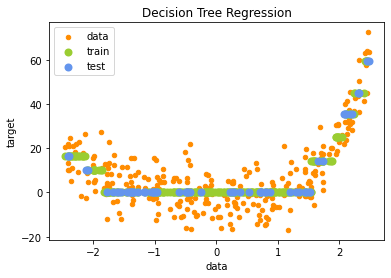

In [23]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, s=20, c="darkorange", label="data")
plt.scatter(X_train_reg, y_train_reg_pred, color="yellowgreen", label="train", linewidth=2)
plt.scatter(X_test_reg, y_test_reg_pred, color="cornflowerblue", label="test", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

In [24]:
max_depth_reg = best_params_reg["max_depth"]

In [30]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train_reg, y_train_reg_pred)
test_mse = mean_squared_error(y_test_reg, y_test_reg_pred)

In [31]:
mse_tree = [max_depth_reg, train_mse, test_mse]
mse_tree

[3, 73.63328506249215, 78.48428318172321]

In [27]:
with open('mse_tree.pkl', 'wb') as fp:
    pickle.dump(mse_tree, fp)